In [1]:
import numpy as np
import dpdata
import ase
from ase.io import read,write
import os
import matplotlib.pyplot as plt
from ase import Atoms
import shutil

### Dataset generation  
Use dpdata to create different configurations of water perturbing only the FODs and not H2O atoms. This is because for now, we want to include forces in the loss function.

* system
1. Pert_FOD = 200 (0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8) = 20 config each

## Orginal position of H2O atoms that should go in the CLUSTER file.  
1. Unit cell of 10 Å
* O 4.9999571664500007  5.0000000000000000  5.2207225380500004
*  H 4.9999571664500007  6.4299727700000000  4.1138589180500009
*  H 4.9999571664500007  3.5700272300000000  4.1138589180500009
 
2. Original positions of FODs that will be perturbed
*  He 4.9999470468500009  5.0026075396999996  5.2162526237500009
*  He 5.0001625276500006  5.9905207688999997  4.4153197348500006
* He 5.0001692131500004  4.0072238908999998  4.4479858855500005
* He 6.1701970542500009  4.9935068753999996  5.8861382761500005
* He 3.8298029457500009  4.9935210320000003  5.8861410819500009

In [30]:
def perturb(infile,outfile,pert_num,atom_per):
    perturbed_system = dpdata.System(f'{infile}').perturb(pert_num=pert_num, 
    cell_pert_fraction=0.0, 
    atom_pert_distance=atom_per, 
    atom_pert_style='normal')
    perturbed_system.to('vasp/poscar',f'{outfile}')

In [4]:
pert_dist=[0.1,0.15,0.2,0.25,0.3,0.4,0.45,0.5,0.6,0.7]

In [33]:
for i in range(0,20):
    perturb('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR',
            f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR-{i}',
           20,0.1)

In [34]:
for i in range(20,40):
    perturb('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR',
            f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR-{i}',
           20,0.15)

In [35]:
for i in range(40,60):
    perturb('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR',
            f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR-{i}',
           20,0.2)

In [36]:
for i in range(60,80):
    perturb('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR',
            f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR-{i}',
           20,0.25)

In [37]:
for i in range(80,100):
    perturb('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR',
            f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR-{i}',
           20,0.3)

In [38]:
for i in range(100,120):
    perturb('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR',
            f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR-{i}',
           20,0.4)

In [39]:
for i in range(120,140):
    perturb('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR',
            f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR-{i}',
           20,0.45)

In [40]:
for i in range(140,160):
    perturb('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR',
            f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR-{i}',
           20,0.5)

In [41]:
for i in range(160,180):
    perturb('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR',
            f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR-{i}',
           20,0.6)

In [42]:
for i in range(180,200):
    perturb('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR',
            f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR-{i}',
           20,0.7)

### POSCAR to ASE xyz

In [43]:
for i in range(200):
    a=read(f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/POSCAR-{i}') ###Atoms object
    write(f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/frmorb-{i}',a,format='xyz')

In [44]:
## ASE xyz to FRMORB
## Create FRMORB file from perturb FOD 
for i in range(0,200): 
    s=np.loadtxt(f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/PertFOD/frmorb-{i}',skiprows=2,usecols=(1,2,3))
    write=np.savetxt(f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/FRMORB-files/FRMORB-{i}',s,fmt='%1.10f',header='5 0',comments='',newline='\n')

In [46]:
## Create a single CLUSTER file for pert FOD systems
target_PATH='/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/CLUSTER-file'

infile=np.loadtxt(f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/CLUSTER-org',skiprows=2,usecols=(1,2,3))
#     print(len(infile))
if len(infile) == 8:
    X_Atoms=np.array(infile[-3:,0])
    Y_Atoms=np.array(infile[-3:,1])
    Z_Atoms=np.array(infile[-3:,2])
elif len(infile) == 3:
    X_Atoms=np.array(infile[-3:,0])
    Y_Atoms=np.array(infile[-3:,1])
    Z_Atoms=np.array(infile[-3:,2])

atom_no=np.array(['8','1','1'])
keyword_ALL=np.array(['ALL','ALL','ALL'])
AB=np.zeros(keyword_ALL.size, dtype=[('var1',float),('var2',float),('var3', float),('var4', 'U6'),('var5','U6')]) ##structured array
AB['var1'] = X_Atoms
AB['var2'] = Y_Atoms
AB['var3'] = Z_Atoms
AB['var4'] = atom_no
AB['var5'] = keyword_ALL


np.savetxt(f'{target_PATH}/CLUSTER',AB,fmt='%10.10f %10.10f %10.10f %10s %10s ',
                   header='LDA-PW91*LDA-PW91\nGRP\n3  Number of inequivalent atoms',
                  footer='0.00000000      0.00000000      0.00000000   ALL\n0.0     0.000     Charge and Moment\n ',comments='')

### Visualize FOD+atoms

In [48]:
for i in range(200):
    atom_fod=Atoms('He5',positions=np.loadtxt(f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/FRMORB-files/FRMORB-{i}',skiprows=1,usecols=(0,1,2)))
    atom_cluster=Atoms('OHH',positions=np.loadtxt(open(f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/CLUSTER-file/CLUSTER','rt').readlines()[:6:], skiprows=3,usecols=(0,1,2)))
    atom_fod += atom_cluster
    write(f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/Visualize/{i}.xyz',atom_fod,format='xyz')

### Run FLOSIC LDA DFT calculation

In [49]:
### Perform LDA DFT calculation
for i in range(0,200):
#     print(i)
    os.chdir('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03')
    os.chdir('RUN_FLOSIC')
    os.mkdir(f'{i}')
    os.chdir(f'{i}')
    os.system(f'cp /bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/FRMORB-files/FRMORB-{i} .')
    os.system(f'cp /bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/CLUSTER-file/CLUSTER .')
    os.system('cp /bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/nrlmolDft.opa.batch .')
    os.system('cp /bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/NRLMOL_INPUT.DAT .')
    f = open("nrlmolDft.opa.batch", "rt")
    data = f.read()
    data = data.replace('runs',str(i))
    f.close()

    f = open("nrlmolDft.opa.batch","wt")
    f.write(data)
    f.close()
    
    os.system('sbatch nrlmolDft.opa.batch')
    

### Check failed LDA jobs

In [57]:
fail=[]
success=[]
path = '/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/RUN_FLOSIC/'
for d in os.listdir(path):
    print(d)
    if len(os.listdir(path+d)) > 4:
        slurm_file = [x for x in os.listdir(path+d) if x.split('.')[-1] == 'out']
        slurm_path = path+d+'/'+slurm_file[0]
        if os.stat(slurm_path).st_size == 0: 
            print('Success: ', d)
            success.append(d)
        else:
            s = open(slurm_path,'r').readlines()[-2] 
            print('Failed :::',d, s.split(' ')[-6])
            fail.append(d)
        
print(success)  
# print(len(success))
print(fail)

76
Success:  76
98
Success:  98
3
Success:  3
9
Success:  9
92
Success:  92
140
Success:  140
137
Success:  137
33
Success:  33
44
Success:  44
196
Success:  196
178
Success:  178
105
Success:  105
172
Success:  172
39
Success:  39
153
Success:  153
124
Success:  124
81
Success:  81
18
Success:  18
65
Success:  65
12
Success:  12
159
Success:  159
116
Success:  116
161
Success:  161
185
Success:  185
20
Success:  20
57
Success:  57
188
Success:  188
166
Success:  166
111
Success:  111
182
Success:  182
50
Success:  50
27
Success:  27
123
Success:  123
154
Success:  154
68
Success:  68
86
Success:  86
15
Success:  15
62
Success:  62
129
Success:  129
43
Success:  43
34
Success:  34
108
Success:  108
191
Success:  191
175
Success:  175
102
Success:  102
49
Success:  49
4
Success:  4
71
Success:  71
95
Success:  95
130
Success:  130
147
Success:  147
134
Success:  134
143
Success:  143
91
Success:  91
75
Success:  75
0
Success:  0
149
Success:  149
171
Success:  171
106
Success:  106
195


### Re-run failed LDA jobs

In [56]:
### Perform LDA DFT calculation
for i in fail:
#     print(i)
    os.chdir('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03')
    os.chdir('RUN_FLOSIC')
    shutil.rmtree(f'{i}')
    os.mkdir(f'{i}')
    os.chdir(f'{i}')
    os.system(f'cp /bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/FRMORB-files/FRMORB-{i} .')
    os.system(f'cp /bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/CLUSTER-file/CLUSTER .')
    os.system('cp /bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/nrlmolDft.opa.batch .')
    os.system('cp /bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/NRLMOL_INPUT.DAT .')
    f = open("nrlmolDft.opa.batch", "rt")
    data = f.read()
    data = data.replace('runs',str(i))
    f.close()

    f = open("nrlmolDft.opa.batch","wt")
    f.write(data)
    f.close()
    
    os.system('sbatch nrlmolDft.opa.batch')
    

### Run FLOSIC SPE calculation

In [58]:
for i in range(200):
#     print(i)
    os.chdir('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/')
    os.chdir('RUN_FLOSIC')
    os.chdir(f'{i}')
    os.system(f'cp FRMORB-{i} FRMORB')
    os.system('cp /bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/NRLMOL_INPUT.DAT .')  ## SCF convergence 2e-6
    os.system('cp /bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/nrlmolFLOSIC.opa.batch .')
    f = open("nrlmolFLOSIC.opa.batch", "rt")
    data = f.read()
    data = data.replace('runs',str(i))
    f.close()

    f = open("nrlmolFLOSIC.opa.batch","wt")
    f.write(data)
    f.close()
    
    os.system('sbatch nrlmolFLOSIC.opa.batch')
    

### Check failed FLOSIC SPE calculation
Two types of failed flosic SPE calculation-
1. SMP fail
2. bad fod descriptors

In [65]:
fail_FLOSIC=[]
success_FLOSIC=[]
path = '/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/RUN_FLOSIC/'
slurm_list=[]
max_slurm=[]
main_dir=[]
root_dir=[]
smp_fail=[]
for d in os.listdir(path):
#     print("d:",d)
    if len(os.listdir(path+d)) > 4:
        for x in os.listdir(path+d):
            if x.split('.')[-1]=='out' and "slurm" in x:
                    y=x.split('-')
                    z=y[-1].split('.')
                    slurm_list.append(z[0])
                    main_dir.append(d)
                    
for ele in range(0, len(slurm_list), 2):
    max_slurm.append(max(slurm_list[ele], slurm_list[ele + 1]))
    root_dir.append(main_dir[ele])
    

        
# print(slurm_list)
# print("Pair maximum of list : " + str(max_slurm))
# print(main_dir)
# print(root_dir)


for i,d in enumerate(root_dir):
    os.chdir(f'{path}')
    os.chdir(f'{d}')
    slurm_path=path+d+'/'+f'slurm-{max_slurm[i]}.out'
    if os.stat(slurm_path).st_size == 0: 
        print('Success: ', d)
        success_FLOSIC.append(d)
    else:
        s = open(slurm_path,'r').readlines()[-2] 
        print('Failed :::',d, s.split(' ')[-6])  ## If s.split(' ')[-6] == was, bad file descriptor
        fail_FLOSIC.append(d)
        split_smp=s.split(' ')[-6]
        if split_smp.split('-')[0]=='smp':
            smp_fail.append(d)
            
        
    
print(success_FLOSIC)  
print(len(success))
print("fail flosic:",fail_FLOSIC)
print(smp_fail)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657', '5601075']
['5599657',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [103]:
fail_FLOSIC=['44', '172', '39', '153', '188', '50', '27', '34', '71', '91', '149', '106', '195', '82', '54', '168', '186', '162', '29', '181', '118', '165', '59', '61', '85', '7', '139', '48', '35', '42', '146', '51', '183', '189', '110', '69', '155', '158', '64', '80', '152', '160', '117', 
 '136', '141', '93', '77', '38', '173', '104', '179', '45', '32', '193', '177', '73', '97', '145', '113', '55', '74', '90', '170']

In [112]:
for i in fail_FLOSIC_3:
#     print(i)
    os.chdir('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/')
    os.chdir('RUN_FLOSIC')
    os.chdir(f'{i}')
#     os.system(f'cp FRMORB-{i} FRMORB')
#     os.system('cp /bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/NRLMOL_INPUT.DAT .')  ## SCF convergence 2e-6
    os.system('cp /bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/nrlmolFLOSIC.opa.batch .')
    f = open("nrlmolFLOSIC.opa.batch", "rt")
    data = f.read()
    data = data.replace('runs',str(i))
    f.close()

    f = open("nrlmolFLOSIC.opa.batch","wt")
    f.write(data)
    f.close()
    
    os.system('sbatch nrlmolFLOSIC.opa.batch')

In [110]:

success_FLOSIC=[]
path = '/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/RUN_FLOSIC/'
slurm_list=[]
max_slurm=[]
main_dir=[]
root_dir=[]
smp_fail=[]

for i in fail_FLOSIC_2:
#     print(i)
    os.chdir('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/')
    os.chdir('RUN_FLOSIC')
    os.chdir(f'{i}')
    for x in os.listdir(path+i):
#         print(x)
        if x.split('.')[-1]=='out' and "slurm" in x:
                    y=x.split('-')
                    z=y[-1].split('.')
                    slurm_list.append(z[0])
                    main_dir.append(i)
print(slurm_list)    
# print(main_dir)
for ele in range(0, len(slurm_list), 4):
    max_slurm.append(max(slurm_list[ele],slurm_list[ele+1], slurm_list[ele + 2],slurm_list[ele+3]))
    root_dir.append(main_dir[ele])
print(max_slurm)
fail_FLOSIC_3=[]
for i,d in enumerate(root_dir):
    os.chdir(f'{path}')
    os.chdir(f'{d}')
    slurm_path=path+d+'/'+f'slurm-{max_slurm[i]}.out'
    if os.stat(slurm_path).st_size == 0: 
        print('Success: ', d)
        success_FLOSIC.append(d)
    else:
        s = open(slurm_path,'r').readlines()[-2] 
        print('Failed :::',d, s.split(' ')[-6])  ## If s.split(' ')[-6] == was, bad file descriptor
        fail_FLOSIC_3.append(d)
        split_smp=s.split(' ')[-6]
        if split_smp.split('-')[0]=='smp':
            smp_fail.append(d)

['5601254', '5599610', '5601033', '5601325', '5601326', '5601268', '5601164', '5599828', '5599830', '5601270', '5601060', '5601327', '5599666', '5601271', '5601084', '5601328', '5601273', '5599720', '5601138', '5601329', '5601330', '5599835', '5601034', '5601275', '5601331', '5601278', '5599632', '5601050', '5601188', '5601332', '5599838', '5601280', '5601283', '5601154', '5599841', '5601333', '5601285', '5601334', '5601063', '5599645', '5601335', '5599661', '5601286', '5601079', '5599741', '5601336', '5601159', '5601288', '5601291', '5601140', '5601337', '5599722', '5601338', '5601292', '5601092', '5599844', '5601294', '5601339', '5601037', '5599614', '5599845', '5601296', '5601340', '5601103', '5599625', '5601044', '5601341', '5601298', '5601300', '5601342', '5601192', '5599774', '5601096', '5599678', '5601303', '5601343', '5599726', '5601344', '5601304', '5601144', '5599655', '5601073', '5601307', '5601345']
['5601325', '5601326', '5601327', '5601328', '5601329', '5601330', '5601331

j: 180
counter_final: 2
start 10


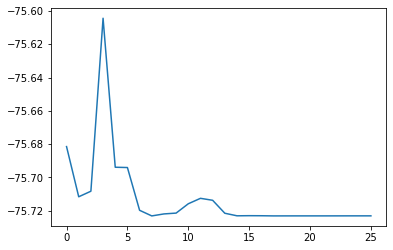

j: 181
counter_final: 3
start 36


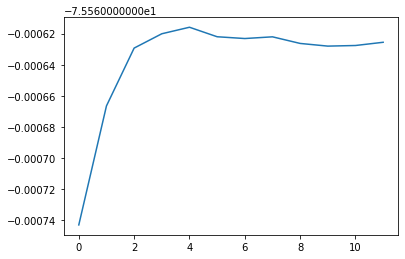

j: 182
counter_final: 2
start 10


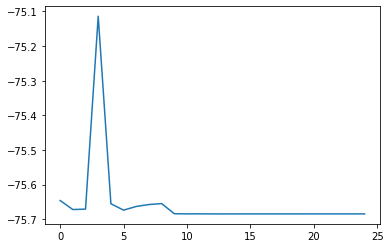

j: 183
counter_final: 3
start 34


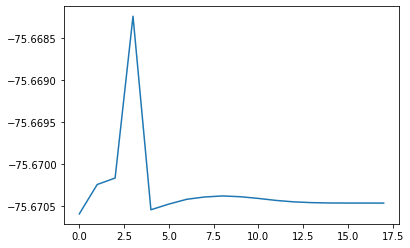

j: 184
counter_final: 2
start 10


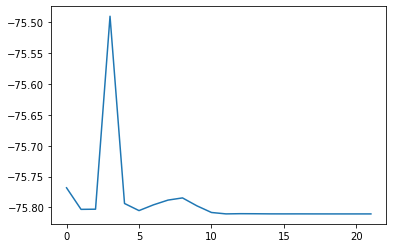

j: 185
counter_final: 2
start 10


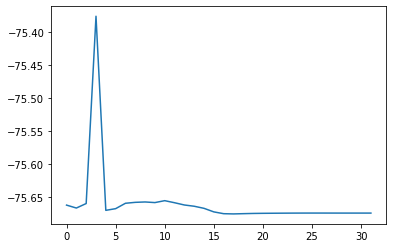

j: 186
counter_final: 3
start 41


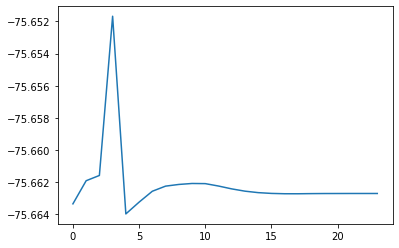

j: 187
counter_final: 2
start 10


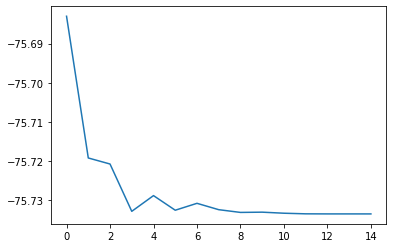

j: 188
counter_final: 3
start 25


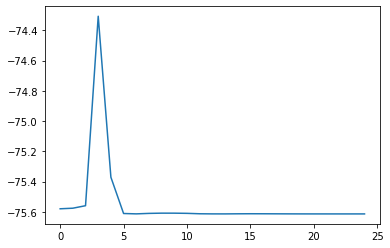

j: 189
counter_final: 4
start 60


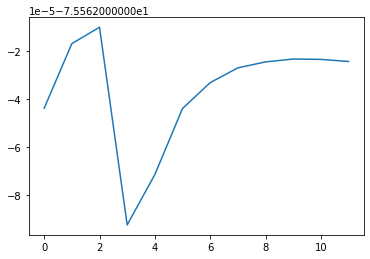

j: 190
counter_final: 2
start 10


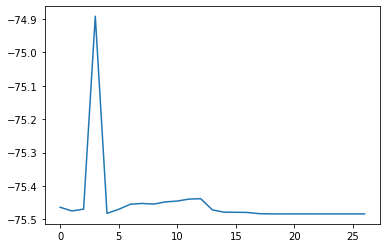

j: 191
counter_final: 2
start 10


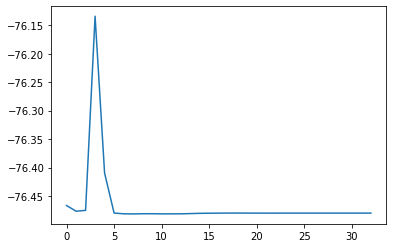

j: 192
counter_final: 2
start 10


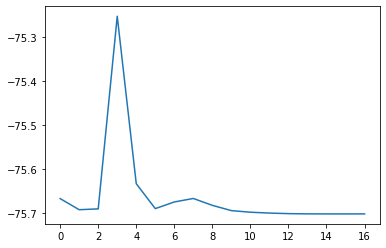

j: 193
counter_final: 4
start 39


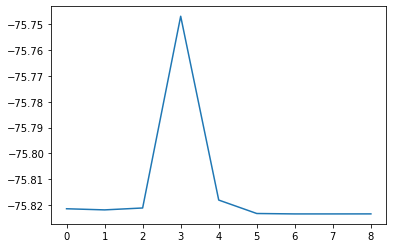

j: 194
counter_final: 2
start 10


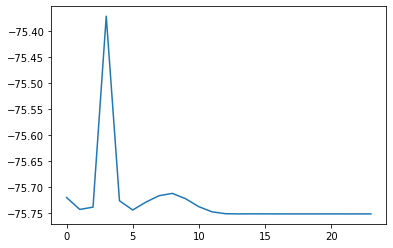

j: 195
counter_final: 3
start 35


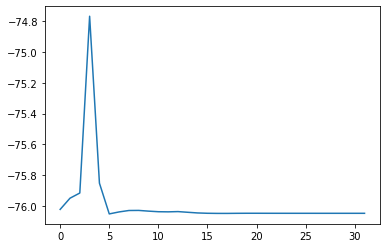

j: 196
counter_final: 2
start 10


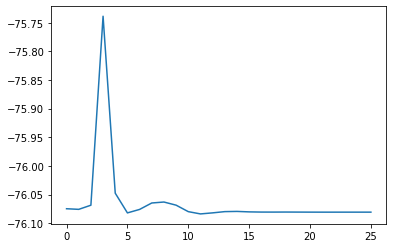

j: 197
counter_final: 2
start 10


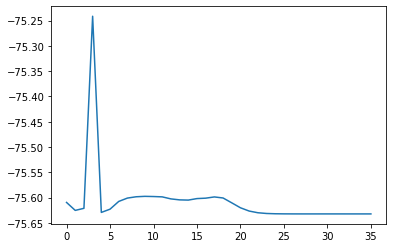

j: 198
counter_final: 2
start 10


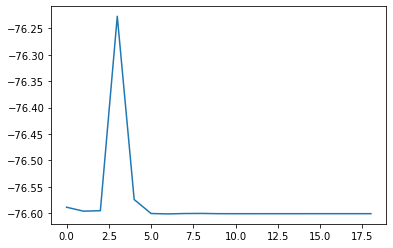

j: 199
counter_final: 2
start 10


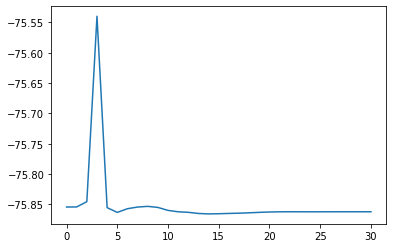

In [114]:
#### Plot SPE convergence of flosic from summary file for geometries (0-39 except 26 and 37)
def plot(s):
    plt.plot(s[:,-2])
    plt.show()

for j in range(180,200):
    counter=0
    print('j:',j)
    with open(f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/RUN_FLOSIC/{j}/SUMMARY') as f:
        lines=f.readlines()
        for i,line in enumerate(lines):  
            split_lines=line.split()
            if 'IT' in split_lines[0]:
#                 print(split_lines)
#                 print(i)
                flosic_start_line=i+1
                counter+=1
        print("counter_final:",counter)
        
        s=np.loadtxt(f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/RUN_FLOSIC/{j}/SUMMARY',skiprows=flosic_start_line)  
        print("start",flosic_start_line)
        plot(s)
    
# plt.plot(s[:,-2])

In [2]:
#### Get FLOSIC forces and energies from records file
path="/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/RUN_FLOSIC/"
# force=np.loadtxt(f'{path}/0/records',skiprows=8)
energy=[]
force=[]

for p in range(200):
    force_counter=0
    no_atoms=0
    small_e=[]
    small_f=[]
    with open(f'{path}/{p}/records') as f:
        lines=f.readlines()
#         print(lines)
        for i,line in enumerate(lines):
#             print("i",i)
            split_lines=line.split()
#             print(split_lines)
            if len(split_lines)==1:
                small_e.append(float(split_lines[0]))
#                 print('small_e:',small_e)
                energy.append(small_e)  ## Correct this
            if len(split_lines)==2:
                n_up=int(split_lines[0]) ##Up FODs
                n_down=int(split_lines[1]) ##Down FODs
                no_atoms= n_up+n_down
#                 print(no_atoms)
            if i>=int(no_atoms)+3:
#                 print("force append")
    #             print(split_lines)
                small_f.append(split_lines)
#                 print("small_f:",small_f)
        force.append(small_f)
        
    #     print(split_lines)


    
print('energy',np.array(energy,dtype=float).T)
# print(success_pertAll)
print('forces',np.array(force,dtype=float))
print('energy',np.array(energy).shape)
print('forces',np.array(force).shape)



energy [[-76.67495811 -76.66953859 -76.67431637 -76.67853535 -76.67300588
  -76.67619047 -76.67698415 -76.66894993 -76.67853336 -76.67726612
  -76.67754033 -76.67749107 -76.67262625 -76.6786456  -76.67848567
  -76.67842936 -76.67590971 -76.6715953  -76.67810237 -76.6691556
  -76.6772398  -76.63137734 -76.66709701 -76.67699755 -76.61568488
  -76.67538868 -76.67160823 -76.6365834  -76.67215406 -76.6708934
  -76.67283431 -76.67518595 -76.66135012 -76.67450553 -76.660839
  -76.65733238 -76.67642803 -76.67424441 -76.46782048 -76.44278741
  -76.67024729 -76.56276469 -76.56636189 -76.67652691 -76.55306233
  -76.43396356 -76.65515098 -76.66701958 -76.66400649 -76.66297121
  -75.99322428 -76.33062539 -76.67777189 -76.65842741 -76.57910251
  -76.66985938 -76.66976721 -76.67173285 -76.67538567 -76.66969148
  -76.64948127 -76.65165423 -76.49924228 -76.64884157 -76.6615058
  -76.6636619  -76.61539573 -76.67530324 -76.45957786 -76.37303224
  -76.64462873 -76.51895905 -76.64714218 -76.67360769 -76.44

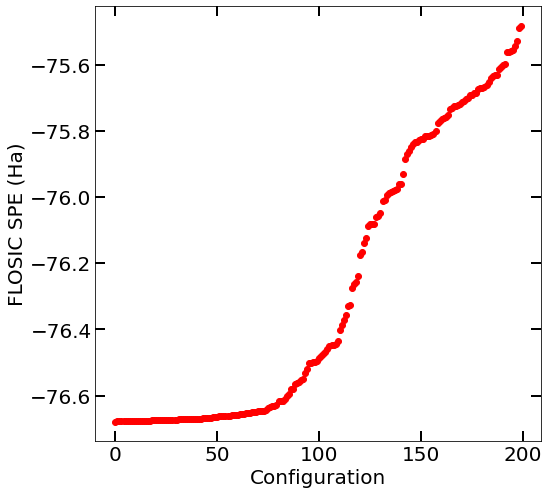

In [11]:
plt.figure(figsize=(8,8))
plt.plot(np.sort(energy, axis=0),'ro')
plt.xlabel('Configuration',size=20)
plt.ylabel('FLOSIC SPE (Ha)', size=20)
plt.tick_params(direction = 'in', right = True, top = True)
plt.tick_params(axis='y',labelsize = 20,length=10, width=2)
plt.tick_params(axis='x',labelsize = 20,length=10, width=2)
plt.savefig('/ihome/kjohnson/pbs13/PhD/FLOSIC/Python/DP_FLOSIC/H2O_perturbFOD.03/EnergyProfile.png',dpi=400,bbox_inches='tight')

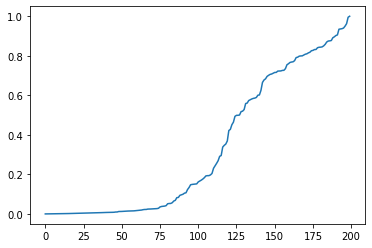

In [17]:
from sklearn.preprocessing import MinMaxScaler
a = MinMaxScaler()
a.fit(energy)
energy_e = a.transform(energy)
plt.plot(np.sort(energy_e,axis=0))

In [18]:
energy=np.array(energy,dtype=float).reshape(200)
force=np.array(force,dtype=float)
energy.shape

(200,)

In [12]:
## Create SOAP descriptors
import dscribe
from dscribe.descriptors import SOAP
from ase.visualize import view

# Setting up the SOAP descriptor
species=["He"]
soap = SOAP(
    species=species,
    periodic=False,
    rcut=10.0,
    sigma=0.25,
    nmax=6,
    lmax=6,
)
print(soap.get_number_of_features())

147


In [13]:
# Generate dataset of energies and forces
from ase import Atoms
n_samples=200
traj=[]
n_atoms=5
# energies=np.zeros(n_samples)
energies=np.array([])
# forces=np.zeros((n_samples, n_atoms, 3))
forces=np.array([])
r=np.arange(n_samples)

for i in range(200):
#     print(i)
    a=Atoms('He5',
            positions=Atoms('He5',positions=np.loadtxt(f'/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/RUN_FLOSIC/{i}/FRMORB-{i}'
                                                      ,skiprows=1,usecols=(0,1,2))).get_positions())
    traj.append(a)

energies=np.array(energy).reshape(len(energy))
forces=np.array(force,dtype=float)
# print(energies)
print(energies.shape) 
print(forces.shape)

(200,)
(200, 5, 3)


In [14]:
## Get center of mass for optimized FOD coordinates

h2o_fod_pos=read('/bgfs/kjohnson/pbs13/FLOSIC/Projects/DP_FLOSIC/H2O_200config.03/fodPlusCluster.xyz',format='xyz')
h2o_fod_pos.get_center_of_mass()

array([5.00005576, 4.99747602, 5.17036752])

In [15]:
derivatives, descriptors = soap.derivatives(
    traj,
    positions=[[h2o_fod_pos.get_center_of_mass()]]*len(r),
    method="analytical"
)
print(derivatives.shape)
print(descriptors.shape)


(200, 1, 5, 3, 147)
(200, 1, 147)


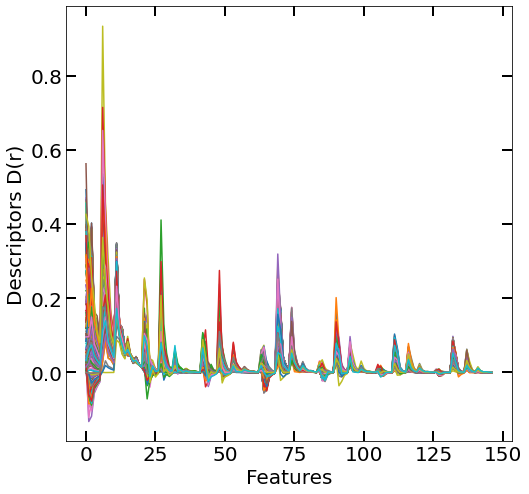

In [28]:
plt.figure(figsize=(8,8))
for i in range(len(r)):
#     print(i)
    plt.plot(descriptors[i].T)
    
    
# plt.xlim(0,200)
plt.xlabel('Features',size=20)
plt.ylabel('Descriptors D(r)', size=20)
plt.tick_params(direction = 'in', right = True, top = True)
plt.tick_params(axis='y',labelsize = 20,length=10, width=2)
plt.tick_params(axis='x',labelsize = 20,length=10, width=2)

plt.savefig('/ihome/kjohnson/pbs13/PhD/FLOSIC/Python/DP_FLOSIC/H2O_perturbFOD.03/SOAP.png',dpi=400,bbox_inches='tight')
# plt.savefig('/ihome/kjohnson/pbs13/PhD/FLOSIC/Python/DP_FLOSIC/H2O_perturbFOD.03/SOAP.png')

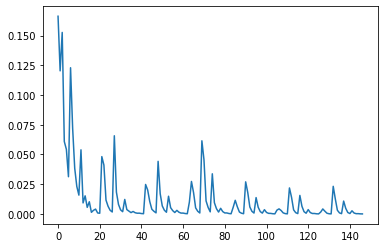

In [63]:
plt.plot(np.std(descriptors, axis=0)[0]);
# np.std(descriptors, axis=0)

In [22]:
# Save to disk for later training
np.save("/ihome/kjohnson/pbs13/PhD/FLOSIC/Python/DP_FLOSIC/H2O_perturbFOD.03/r.npy", r)
np.save("/ihome/kjohnson/pbs13/PhD/FLOSIC/Python/DP_FLOSIC/H2O_perturbFOD.03/E.npy", energies)
np.save("/ihome/kjohnson/pbs13/PhD/FLOSIC/Python/DP_FLOSIC/H2O_perturbFOD.03/D.npy", descriptors)
np.save("/ihome/kjohnson/pbs13/PhD/FLOSIC/Python/DP_FLOSIC/H2O_perturbFOD.03/dD_dr.npy", derivatives)
np.save("/ihome/kjohnson/pbs13/PhD/FLOSIC/Python/DP_FLOSIC/H2O_perturbFOD.03/F.npy", forces)